## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [3]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [4]:
stockx = pd.read_excel('StockX_Dataset.xlsx').dropna()
stockx.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island


In [6]:
stockx_train, stockx_test = train_test_split(stockx, test_size=0.3, random_state=42, stratify=stockx['Brand'])
print(stockx_train.shape, stockx_test.shape)

(69969, 8) (29987, 8)


In [23]:
features= ['Shoe Size', 'Retail Price']
dt_regression = DecisionTreeRegressor(max_depth = 5) # Increase max_depth to see effect in the plot
dt_regression.fit(stockx_train[features], stockx_train['Sale Price'])

DecisionTreeRegressor(max_depth=5)

In [24]:
predictionsOnTrainset = dt_regression.predict(stockx_train[features])
predictionsOnTestset = dt_regression.predict(stockx_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, stockx_train['Sale Price'])
rmseTest = calculate_rmse(predictionsOnTestset, stockx_test['Sale Price'])

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 179.74928980500366
RMSE on test set 181.12676839930694


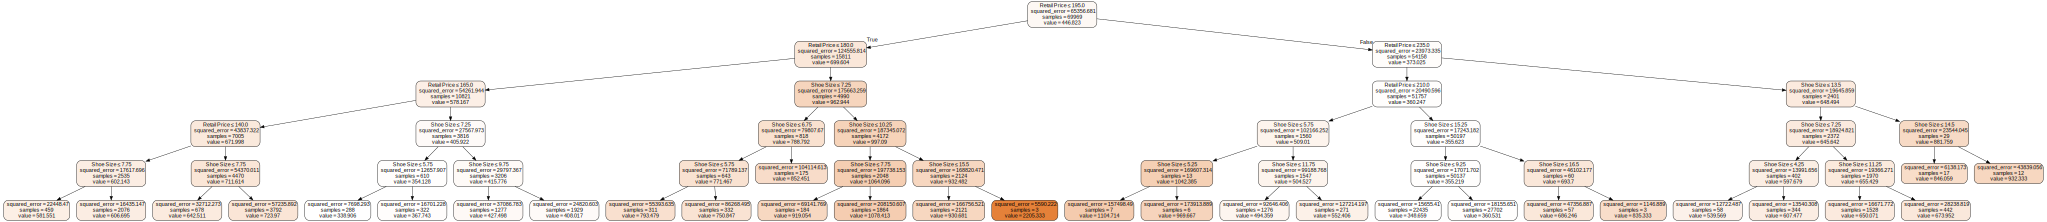

In [20]:
plot_tree_regression(dt_regression, features)

De RMSE van de training en test set zijn best gelijk (+- 180). Echter is dit te hoog als het gaat om sneaker prijzen. Je zou dus kunnen voorspellen dat een sneaker mogelijk 400 euro waard is met een retail price van 200 waardoor je 200 euro wist zou maken. Omdat er een RMSE van 180 is zou dit ook veel lager uitkunnen vallen.  